In [0]:
#Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import warnings

# scikit-learn bootstrap
from sklearn.utils import resample
import pandas as pd
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats

In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape,"/n", "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) /n y_train shape: (60000,)


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

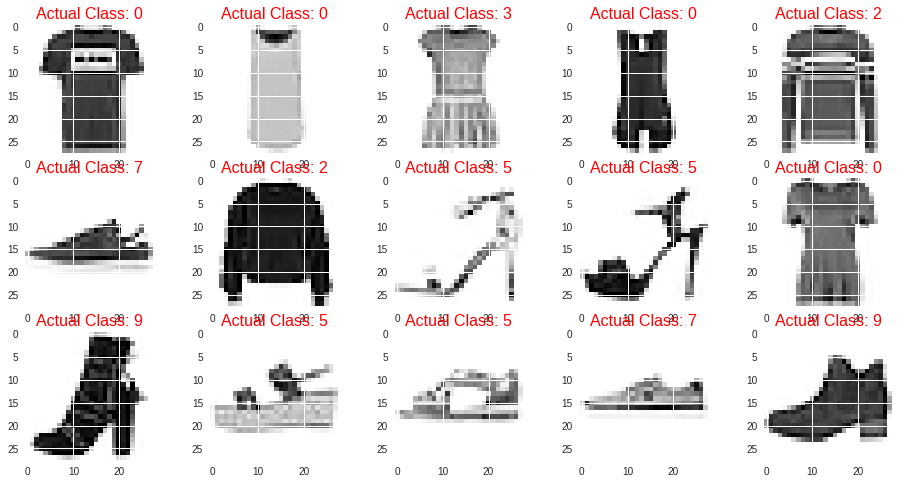

In [5]:
fig=plt.figure(figsize=(16,8))
columns=5  #number of columns for images in plot
rows=3

for i in range (1,columns*rows+1):
      fig.add_subplot(rows,columns,i)
      plt.title("Actual Class: {}".\
              format((y_train[i])),color='r',fontsize=16)
      plt.imshow(x_train[i])
plt.show()

In [97]:
accuracy = pd.DataFrame( columns=["Accuracy","Precision","Recall"])
predictions = np.zeros(shape=(10000,7))
row_index = 0
for i in range(7):
        # bootstrap sampling  
        boot_train = resample(x_train,y_train,replace=True, n_samples=40000, random_state=None)
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(256, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
  
        # compile the model
        model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  
        # Train the model
        model.fit(x_train,y_train,epochs=5,batch_size=64)
  
        # Evaluate accuracy
        score = model.evaluate(x_test, y_test, batch_size=64)
        accuracy.loc[row_index,"Accuracy"]=score[1]
  
        # Make predictions
        model_pred= model.predict(x_test)
        pred_classes =model_pred.argmax(axis=-1)
        accuracy.loc[row_index, 'Precision'] = precision_score(y_test, pred_classes, average='weighted')
        accuracy.loc[row_index, 'Recall'] = recall_score(y_test, pred_classes,average='weighted')
  
        # Save predictions to predictions array
        predictions[:,i] = pred_classes
  
        print(score)
        row_index+=1

        print("Iteration " + str(i+1)+ " Accuracy : " + "{0}".format(score[1]))

Epoch 1/5
60000/60000 [==============================] - 22s 364us/step - loss: 0.6757 - acc: 0.7487
Epoch 2/5
60000/60000 [==============================] - 12s 208us/step - loss: 0.4720 - acc: 0.8363
Epoch 3/5
60000/60000 [==============================] - 13s 208us/step - loss: 0.4370 - acc: 0.8488
Epoch 4/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.4110 - acc: 0.8580
Epoch 5/5
10000/10000 [==============================] - 5s 489us/step
[0.4054821112036705, 0.8666]
Iteration 1 Accuracy : 0.8666
Epoch 1/5
60000/60000 [==============================] - 22s 374us/step - loss: 0.6486 - acc: 0.7657
Epoch 2/5
60000/60000 [==============================] - 13s 209us/step - loss: 0.4655 - acc: 0.8380
Epoch 3/5
60000/60000 [==============================] - 13s 210us/step - loss: 0.4276 - acc: 0.8508
Epoch 4/5
60000/60000 [==============================] - 13s 209us/step - loss: 0.4191 - acc: 0.8541
Epoch 5/5
10000/10000 [==============================] - 5s 51

In [183]:
accuracy

,Accuracy,Precision,Recall,Models
0,0.8666,0.867061,0.8666,Iteration 1
1,0.8526,0.855435,0.8526,Iteration 2
2,0.8468,0.845397,0.8468,Iteration 3
3,0.854,0.855318,0.854,Iteration 4
4,0.8601,0.859256,0.8601,Iteration 5
5,0.8418,0.849322,0.8418,Iteration 6
6,0.867,0.866965,0.867,Iteration 7
7,0.8712,0.8712,0.8712,Model


In [0]:
# form dataframe using prediction of each iteration
df_iteration = pd.DataFrame([predictions[:,0],\
                            predictions[:,1],\
                            predictions[:,2],\
                            predictions[:,3],\
                            predictions[:,4],\
                            predictions[:,5],\
                            predictions[:,6]])

In [100]:
df_iteration

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,9.0,2.0,1.0,1.0,6.0,1.0,4.0,6.0,5.0,7.0,...,5.0,6.0,8.0,9.0,1.0,9.0,1.0,8.0,1.0,5.0
1,9.0,2.0,1.0,1.0,6.0,1.0,4.0,6.0,5.0,7.0,...,5.0,3.0,8.0,9.0,1.0,9.0,1.0,8.0,1.0,5.0
2,9.0,2.0,1.0,1.0,6.0,1.0,4.0,6.0,5.0,7.0,...,5.0,6.0,8.0,9.0,1.0,9.0,1.0,8.0,1.0,5.0
3,9.0,2.0,1.0,1.0,6.0,1.0,4.0,6.0,5.0,7.0,...,5.0,6.0,8.0,9.0,1.0,9.0,1.0,8.0,1.0,5.0
4,9.0,2.0,1.0,1.0,6.0,1.0,4.0,6.0,5.0,7.0,...,5.0,6.0,8.0,9.0,1.0,9.0,1.0,8.0,1.0,5.0
5,9.0,2.0,1.0,1.0,6.0,1.0,4.0,6.0,5.0,7.0,...,5.0,6.0,8.0,9.0,1.0,9.0,1.0,8.0,1.0,5.0
6,9.0,2.0,1.0,1.0,6.0,1.0,4.0,6.0,5.0,7.0,...,5.0,6.0,8.0,9.0,1.0,9.0,1.0,8.0,1.0,5.0


In [0]:
# find the mode for result
mode = stats.mode(df_iteration)

In [102]:
mode

ModeResult(mode=array([[9., 2., 1., ..., 8., 1., 5.]]), count=array([[7, 7, 7, ..., 7, 7, 7]]))

In [103]:
# calculate the accuracy for test dataset for the mode
print(accuracy_score( y_test, mode[0].T))

0.8712


### Confusin Matrix

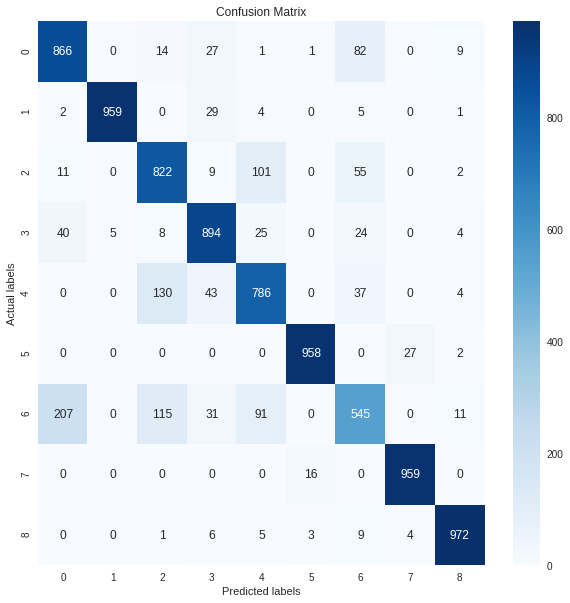

In [181]:
plt.figure(figsize=(10,10))

# confusion matrix
cm = confusion_matrix(y_test, mode[0].T, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 

In [0]:
#acuracy_bkup = accuracy
accuracy = acuracy_bkup

In [0]:
accuracy["Models"]=["Iteration 1",\
                   "Iteration 2",\
                   "Iteration 3",\
                   "Iteration 4",\
                   "Iteration 5",\
                   "Iteration 6",\
                   "Iteration 7"]

In [172]:
accuracy

,Accuracy,Precision,Recall,Models
0,0.8666,0.867061,0.8666,Iteration 1
1,0.8526,0.855435,0.8526,Iteration 2
2,0.8468,0.845397,0.8468,Iteration 3
3,0.854,0.855318,0.854,Iteration 4
4,0.8601,0.859256,0.8601,Iteration 5
5,0.8418,0.849322,0.8418,Iteration 6
6,0.867,0.866965,0.867,Iteration 7


In [161]:
pd.DataFrame([[accuracy_score( y_test,mode[0].T),0,0,"Model"]],columns=["Accuracy","Precision","Recall","Models"])


,Accuracy,Precision,Recall,Models
0,0.8712,0,0,Model


In [0]:
accuracy=accuracy.append(pd.DataFrame([[accuracy_score( y_test,mode[0].T),0,0,"Model"]],\
                                      columns=["Accuracy","Precision","Recall","Models"]))


In [163]:
accuracy

,Accuracy,Precision,Recall,Models
0,0.8666,0.867061,0.8666,Iteration 1
1,0.8526,0.855435,0.8526,Iteration 2
2,0.8468,0.845397,0.8468,Iteration 3
3,0.854,0.855318,0.854,Iteration 4
4,0.8601,0.859256,0.8601,Iteration 5
5,0.8418,0.849322,0.8418,Iteration 6
6,0.867,0.866965,0.867,Iteration 7
0,0.8712,0,0,Model


In [0]:
accuracy.index=range(accuracy.shape[0])


In [165]:
accuracy.index

RangeIndex(start=0, stop=8, step=1)

In [166]:
accuracy.set_value(7, 'Precision', precision_score(y_test, mode[0].T, average='micro'))
accuracy.set_value(7, 'Recall', recall_score(y_test, mode[0].T, average='micro'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Accuracy,Precision,Recall,Models
0,0.8666,0.867061,0.8666,Iteration 1
1,0.8526,0.855435,0.8526,Iteration 2
2,0.8468,0.845397,0.8468,Iteration 3
3,0.854,0.855318,0.854,Iteration 4
4,0.8601,0.859256,0.8601,Iteration 5
5,0.8418,0.849322,0.8418,Iteration 6
6,0.867,0.866965,0.867,Iteration 7
7,0.8712,0.8712,0.8712,Model


In [173]:
pd.DataFrame([[accuracy_score( y_test,mode[0].T),0,0,"Model"]],columns=["Accuracy","Precision","Recall","Models"])

accuracy=accuracy.append(pd.DataFrame([[accuracy_score( y_test,mode[0].T),0,0,"Model"]],\
                                      columns=["Accuracy","Precision","Recall","Models"]))

accuracy.index=range(accuracy.shape[0])

accuracy.set_value(7, 'Precision', precision_score(y_test, mode[0].T, average='micro'))
accuracy.set_value(7, 'Recall', recall_score(y_test, mode[0].T, average='micro'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Accuracy,Precision,Recall,Models
0,0.8666,0.867061,0.8666,Iteration 1
1,0.8526,0.855435,0.8526,Iteration 2
2,0.8468,0.845397,0.8468,Iteration 3
3,0.854,0.855318,0.854,Iteration 4
4,0.8601,0.859256,0.8601,Iteration 5
5,0.8418,0.849322,0.8418,Iteration 6
6,0.867,0.866965,0.867,Iteration 7
7,0.8712,0.8712,0.8712,Model


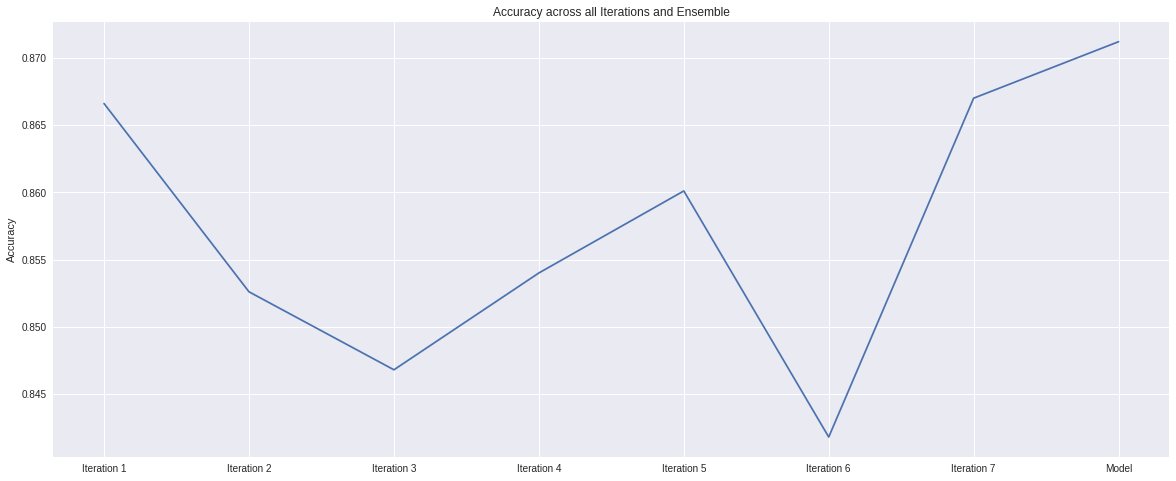

In [176]:
plt.figure(figsize=(20,8))
plt.plot(accuracy.Models,accuracy.Accuracy)
plt.title("Accuracy across all Iterations and Ensemble")
plt.ylabel("Accuracy")
plt.show()

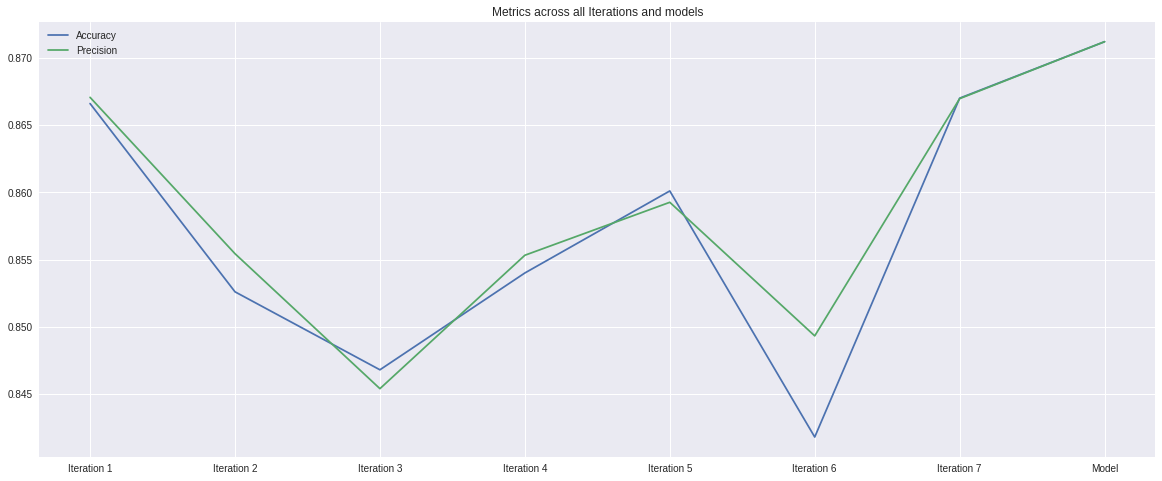

In [179]:
plt.figure(figsize=(20,8))
plt.plot(accuracy.Models,accuracy.Accuracy,accuracy.Models,accuracy.Precision)
plt.title("Metrics across all Iterations and models")
plt.legend(["Accuracy","Precision"])
plt.show()